In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline

In [39]:
data = pd.read_csv(r'C:\Users\Parth Dixit\Downloads\Python_Real-World Machine Learning with Python\ipo_data.csv',encoding='latin-1')
data

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1/8/19,MMTEC,MTC,WestPark Capital,$4.00,$5.91,$7.55,88.75%,$1.91,$3.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,$10.00,$10.00,$10.01,0.10%,$0.00,$0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,$20.00,$20.00,$20.20,1.00%,$0.00,$0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,$14.00,$13.25,$13.07,-6.64%,-$0.75,-$0.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,$10.00,$10.05,$10.10,1.00%,$0.05,$0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2/1/19,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,$10.00,$10.14,$10.12,1.20%,$0.14,$0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2/6/19,Wealthbridge Acquisition,HHHHU,Chardan,$10.00,$10.01,$10.01,0.10%,$0.01,$0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2/7/19,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,$19.00,$18.70,$18.00,-5.26%,-$0.30,-$1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2/7/19,Monocle Acquisition,MNCLU,Cowen/ Chardan,$10.00,$10.00,$10.01,0.10%,$0.00,$0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2/8/19,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,$16.00,$19.00,$17.94,12.13%,$3.00,$1.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data = data.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
data = data.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
data = data.applymap(lambda x: x if not '(' in str(x) else x.replace('(',''))
data = data.applymap(lambda x: x if not ')' in str(x) else x.replace(')',''))

data

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1/8/19,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,-0.75,-0.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2/1/19,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2/6/19,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2/7/19,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,-0.30,-1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2/7/19,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2/8/19,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 38 columns):
Date                        3355 non-null object
Issuer                      3355 non-null object
Symbol                      3355 non-null object
Lead/Joint-Lead Managers    3355 non-null object
Offer Price                 3355 non-null object
Opening Price               3355 non-null object
1st Day Close               3355 non-null object
1st Day % Px Chng           3354 non-null object
$ Chg Opening               3355 non-null object
$ Chg Close                 3355 non-null object
Star Ratings                3355 non-null object
Performed                   381 non-null object
Unnamed: 12                 0 non-null float64
Unnamed: 13                 0 non-null float64
Unnamed: 14                 0 non-null float64
Unnamed: 15                 0 non-null float64
Unnamed: 16                 0 non-null float64
Unnamed: 17                 0 non-null float64
Unnamed: 18             

In [42]:
data['Star Ratings']

0       1
1       1
2       1
3       1
4       1
       ..
3352    3
3353    2
3354    1
3355    2
3356    2
Name: Star Ratings, Length: 3357, dtype: object

In [43]:
data['Date'] = pd.to_datetime(data['Date'])
data['Offer Price'] = data['Offer Price'].astype('float')
data['Opening Price'] = data['Opening Price'].astype('float')
data['1st Day Close'] = data['1st Day Close'].astype('float')
data['1st Day % Px Chng'] = data['1st Day % Px Chng'].astype('float')
data['$ Chg Close'] = data['$ Chg Close'].astype('float')
data['$ Chg Opening'] = data['$ Chg Opening'].astype('float')
data['Star Ratings'] = data['Star Ratings'].astype('int')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

In [44]:
data[data['Date']=='11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
1491,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data.loc[1491,'Date'] = '2012-11-20'

In [50]:
data[data['Star Ratings'] == 'N/C']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37


In [51]:

top = data[data['Star Ratings'] == 'N/C']

for i in  top.index:
    data.loc[i,'Star Ratings'] = '1'
    
data[data['Star Ratings'] == 'N/C']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37


In [54]:
data['Date'] = pd.to_datetime(data['Date'])
data['Offer Price'] = data['Offer Price'].astype('float')
data['Opening Price'] = data['Opening Price'].astype('float')
data['1st Day Close'] = data['1st Day Close'].astype('float')
data['1st Day % Px Chng'] = data['1st Day % Px Chng'].astype('float')
data['$ Chg Close'] = data['$ Chg Close'].astype('float')
data['$ Chg Opening'] = data['$ Chg Opening'].astype('float')
data['Star Ratings'] = data['Star Ratings'].astype('float')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 38 columns):
Date                        3355 non-null datetime64[ns]
Issuer                      3355 non-null object
Symbol                      3355 non-null object
Lead/Joint-Lead Managers    3355 non-null object
Offer Price                 3355 non-null float64
Opening Price               3355 non-null float64
1st Day Close               3355 non-null float64
1st Day % Px Chng           3354 non-null float64
$ Chg Opening               3355 non-null float64
$ Chg Close                 3355 non-null float64
Star Ratings                3355 non-null float64
Performed                   381 non-null object
Unnamed: 12                 0 non-null float64
Unnamed: 13                 0 non-null float64
Unnamed: 14                 0 non-null float64
Unnamed: 15                 0 non-null float64
Unnamed: 16                 0 non-null float64
Unnamed: 17                 0 non-null float64
Unnamed: 

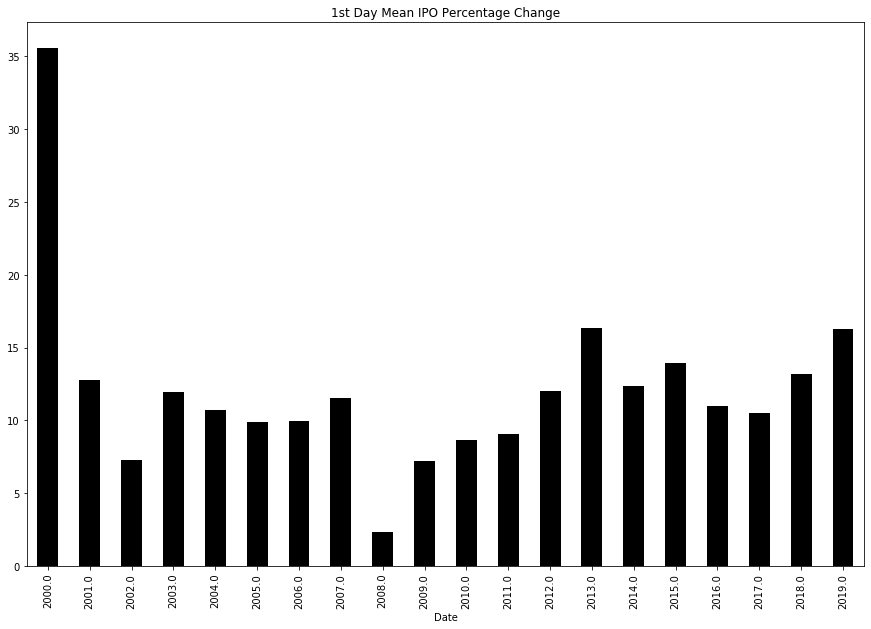

In [56]:
data.groupby(data['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

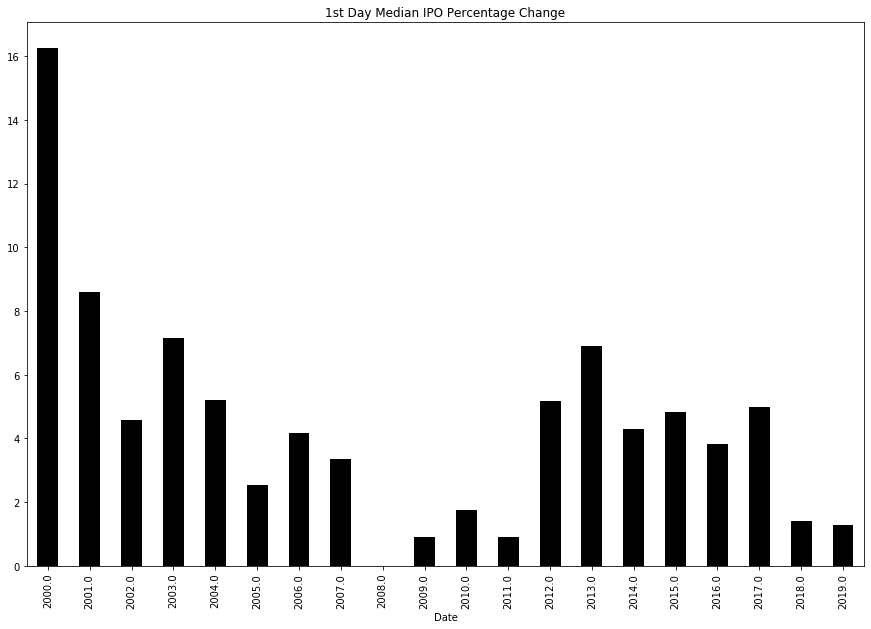

In [57]:
data.groupby(data['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

In [58]:
data['1st Day % Px Chng'].describe()

count    3354.000000
mean       13.239880
std        27.475243
min       -41.080000
25%         0.000000
50%         4.190000
75%        19.320000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

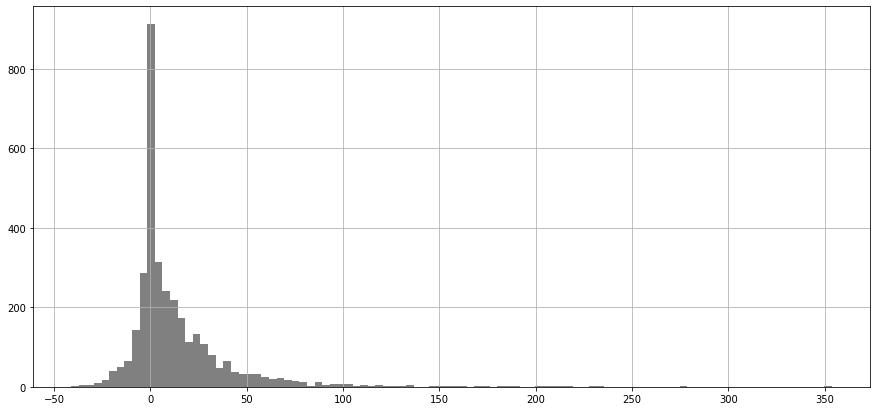

In [59]:
data['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

In [60]:
data['$ Chg Open to Close'] = data['$ Chg Close'] - data['$ Chg Opening']
data['% Chg Open to Close'] = (data['$ Chg Open to Close']/data['Opening Price']) * 100
data

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,27.749577
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.100000
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,1.000000
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,-0.75,-0.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18,-1.358491
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.497512
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.02,-0.197239
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000000
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,-0.30,-1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.70,-3.743316
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.100000
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.06,-5.578947


In [61]:
data['% Chg Open to Close'].describe()

count    3355.000000
mean        1.324511
std        11.195072
min       -98.522167
25%        -2.885148
50%         0.000000
75%         4.000000
max       159.417476
Name: % Chg Open to Close, dtype: float64

In [64]:
data[data['% Chg Open to Close']<-50]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close
2451,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.0,6.22,3.67,6.22,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,-98.522167


In [65]:
data.loc[2451,'Opening Price'] = data.loc[2451, 'Offer Price'] 

In [66]:
data['$ Chg Opening'] = data['Opening Price'] - data['Offer Price']
data['$ Chg Close'] = data['1st Day Close'] - data['Offer Price']
data['$ Chg Open to Close'] = data['$ Chg Close'] - data['$ Chg Opening']
data['% Chg Open to Close'] = (data['$ Chg Open to Close']/data['Opening Price']) * 100
data['% Chg Open to Close'].describe()

count    3355.000000
mean        1.316739
std        10.909974
min       -49.281222
25%        -2.887139
50%         0.000000
75%         3.987768
max       159.417476
Name: % Chg Open to Close, dtype: float64

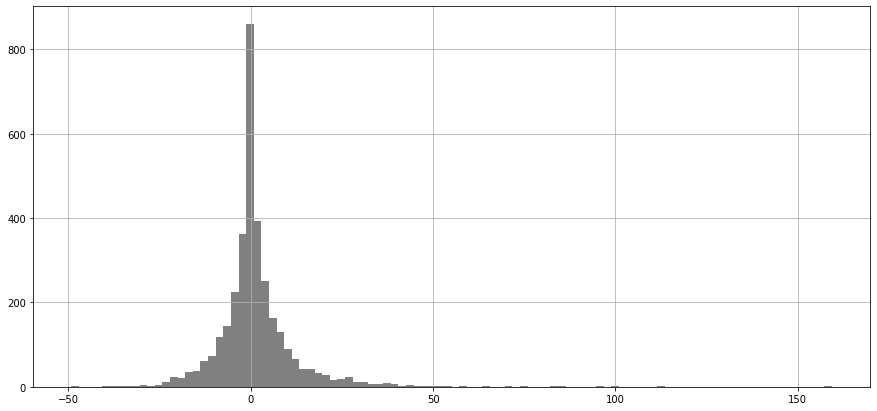

In [67]:
data['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [68]:
data[data['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    835.000000
mean       0.192491
std        2.264319
min       -8.950000
25%       -0.550000
50%        0.000000
75%        0.555000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [69]:
data[data['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

160.73

In [70]:
data[(data['Date']>='2015-01-01') & (data['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    381.000000
mean       1.510394
std        2.480602
min        0.010000
25%        0.150000
50%        0.660000
75%        1.720000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [71]:
data[(data['Date']>='2015-01-01') & (data['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    387.000000
mean      -1.071654
std        1.302717
min       -8.950000
25%       -1.470000
50%       -0.650000
75%       -0.185000
max       -0.010000
Name: $ Chg Open to Close, dtype: float64

In [72]:
sp_data = pd.read_csv(r'C:\Users\Parth Dixit\Downloads\Python_Real-World Machine Learning with Python\PMLB Datasets\PMLB Datasets copy\sp.csv',encoding='latin-1')
sp_data.sort_values('Date',inplace=True)
sp_data.reset_index(drop=True,inplace=True)
sp_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1465.150024,1085900000


In [73]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp_data[sp_data['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp_data[sp_data['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp_data.iloc[day_ago_idx]['Close'] - \
               sp_data.iloc[week_ago_idx]['Close'])/(sp_data.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [74]:
data['SP week change'] = data['Date'].map(get_week_chg)

error 2019-02-24
error NaT
error NaT
error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [75]:
data[data['Date'] == '2019-02-24']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
14,2019-02-24,TCR2 Therapeutic,TCRR,Jefferies/ Leerink Partners/ BMO Capital Markets,15.0,15.15,15.07,0.47,0.15,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.08,-0.528053,NaN


In [76]:
data[data['Date'] == '2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
691,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,1.853659,NaN
692,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,3.947368,NaN


In [77]:
data[data['Date'] == '2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
1320,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,-0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.19,-11.837838,NaN


In [78]:
data[data['Date'] == '2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
1819,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,10.13,2.5,1.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.98,-5.6,NaN


In [79]:
data.loc[14,'Date'] = pd.to_datetime('2019-02-24')
data.loc[14,'Date'] = pd.to_datetime('2015-02-21')
data.loc[14,'Date'] = pd.to_datetime('2013-11-06')
data.loc[14,'Date'] = pd.to_datetime('2009-08-01')

In [80]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp_data[sp_data['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp_data[sp_data['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp_data.iloc[day_ago_idx]['Close'] - \
               sp_data.iloc[week_ago_idx]['Close'])/(sp_data.iloc[week_ago_idx]['Close'])
        return chg * 100
    except Exception as e:
        print('error : ',e,' date : ', ipo_dt.date())

In [81]:
data['SP week change'] = data['Date'].map(get_week_chg)

error :  index 0 is out of bounds for axis 0 with size 0  date :  2009-08-01
error :  index 0 is out of bounds for axis 0 with size 0  date :  NaT
error :  index 0 is out of bounds for axis 0 with size 0  date :  NaT
error :  index 0 is out of bounds for axis 0 with size 0  date :  2015-02-21
error :  index 0 is out of bounds for axis 0 with size 0  date :  2015-02-21
error :  index 0 is out of bounds for axis 0 with size 0  date :  2013-11-16
error :  index 0 is out of bounds for axis 0 with size 0  date :  2009-08-01


In [91]:
data[data['Date'] == '2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
14,2009-08-01,TCR2 Therapeutic,TCRR,Jefferies/ Leerink Partners/ BMO Capital Markets,15.0,15.15,15.07,0.47,0.15,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.08,-0.528053,NaN
1819,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.50,16.52,10.13,2.50,1.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.98,-5.600000,NaN


In [82]:
data[data['Date']=='2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
1320,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,-0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.19,-11.837838,NaN


In [83]:
data[data['Date']=='2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
691,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19,1.853659,NaN
692,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,3.947368,NaN


In [84]:
data[data['Date'] == '2012-11-20']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
1491,2012-11-20,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.0,17.0,18.4,15.0,1.0,2.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,8.235294,0.680939


In [85]:
data[data['Date'] == '2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change
1320,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,-0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.19,-11.837838,NaN


In [97]:
data.loc[14, 'Date'] = pd.to_datetime('2009-08-01')
data.loc[1819, 'Date'] = pd.to_datetime('2009-08-01')
data.loc[1491, 'Date'] = pd.to_datetime('2012-11-20')
data.loc[691, 'Date'] = pd.to_datetime('2015-05-21')
data.loc[692, 'Date'] = pd.to_datetime('2015-05-21')
data.loc[14, 'Date'] = pd.to_datetime('2009-08-01')
data.loc[1819, 'Date'] = pd.to_datetime('2009-08-01')

In [98]:
data.loc[1320, 'Date'] = pd.to_datetime('2013-11-16')

In [99]:
data['SP week change'] = data['Date'].map(get_week_chg)

error :  index 0 is out of bounds for axis 0 with size 0  date :  2009-08-01
error :  index 0 is out of bounds for axis 0 with size 0  date :  NaT
error :  index 0 is out of bounds for axis 0 with size 0  date :  NaT
error :  index 0 is out of bounds for axis 0 with size 0  date :  2013-11-16
error :  index 0 is out of bounds for axis 0 with size 0  date :  2009-08-01


In [100]:
def get_tod_chg(ipo_dt):
    try:
        today_open = sp_data[sp_data['Date'] == str(ipo_dt.date())].index[0]
        yest_close = sp_data[sp_data['Date'] == str(ipo_dt.date())].index[0]-1
        
        per_chg = (sp_data.iloc[today_open]['Open'] - sp_data.iloc[yest_close]['Close'])/(sp_data.iloc[yest_close]['Close'])
        
        return per_chg * 100
    except:
            print()

In [101]:
data['SP Close to Open Chg Pct'] = data['Date'].map(get_tod_chg)

In [102]:
data['Lead Mgr'] = data['Lead/Joint-Lead Managers'].map(lambda x:str(x).split('/')[0])
data['Lead Mgr'] = data['Lead Mgr'].map(lambda x: x.strip())

In [103]:
for n in pd.DataFrame(data['Lead Mgr'].unique(),
columns=['Name']).sort_values('Name',ascending=True)['Name']:
    print(n)

?Barclays
?Credit Suisse
?Jefferies
A.G. Edwards
A.G. Edwards & Sons
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom
Axiom Capital Management
B. Riley FBR
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
Bear, Stearns
Benchmark
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC Capital Markets
CIBC World Markets
CIBC Worldwide
CICC
CRT Capital
CRT Capital Group
CS First Boston
CSFB
CSFirst Boston
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimi

In [104]:
data.loc[data['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

data.loc[data['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

data.loc[data['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

data.loc[data['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

data.loc[data['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

data.loc[data['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

data.loc[data['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

data.loc[data['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

data.loc[data['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

data.loc[325,'Lead Mgr'] = 'Maximum Captial'

data.loc[data['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

data.loc[data['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

data.loc[data['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

data.loc[data['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

data.loc[data['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

data.loc[data['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

data.loc[data['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

data.loc[data['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

data.loc[data['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

data.loc[data['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

data.loc[data['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

data.loc[data['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

data.loc[data['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

data.loc[data['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

data.loc[data['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

data.loc[data['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

data.loc[data['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

data.loc[data['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

data.loc[data['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

data.loc[data['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

data.loc[data['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

data.loc[data['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

data.loc[data['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

data.loc[data['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

data.loc[data['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

data.loc[data['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

data.loc[data['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

data.loc[data['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

data.loc[data['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

data.loc[data['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

data.loc[data['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

data.loc[data['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

data.loc[data['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

data.loc[data['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

data.loc[data['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

data.loc[data['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

data.loc[data['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

data.loc[data['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

data.loc[data['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

data.loc[data['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

data.loc[data['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

data.loc[data['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

data.loc[data['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

data.loc[data['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

data.loc[data['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

data.loc[data['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [105]:
for n in pd.DataFrame(data['Lead Mgr'].unique(),
columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
AMTD Global Markets
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Banc of America
Barclays
Bear Stearns
Benchmark
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC
CICC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Suiss
DA Davidson
DBAB
DLJ
DPO Direct Public Offering
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson, Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
Evercore ISI
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
First Van Kasper
Friedman Billings Ramsey
GS
Gilford Securiti

In [106]:
data['Total Underwriters'] = data['Lead/Joint-Lead Managers'].map(lambda x: len(str(x).split('/')))

In [107]:
data['Week Day'] = data['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues',2:'Wed',\
     3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
data['Month'] = data['Date'].map(lambda x: x.month)
data['Month'] = data['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',\
     8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,Unnamed: 36,Unnamed: 37,$ Chg Open to Close,% Chg Open to Close,SP week change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,...,NaN,NaN,1.64,27.749577,3.322527,0.722447,WestPark Capital,1,Tues,Jan
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,...,NaN,NaN,0.01,0.100000,1.060739,0.039329,Cowen & Co.,2,Tues,Jan
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,...,NaN,NaN,0.20,1.000000,0.153266,0.515914,UBS Investment Bank,6,Wed,Jan
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,-0.75,-0.93,...,NaN,NaN,-0.18,-1.358491,0.387166,0.165605,Morgan Stanley,2,Thurs,Jan
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,...,NaN,NaN,0.05,0.497512,0.387166,0.165605,Cantor Fitzgerald,1,Thurs,Jan
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,...,NaN,NaN,-0.02,-0.197239,2.704250,-0.065827,Deutsche Bank,3,Fri,Feb
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,...,NaN,NaN,0.00,0.000000,2.737205,-0.096793,Chardan,1,Wed,Feb
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,-0.30,-1.00,...,NaN,NaN,-0.70,-3.743316,3.319402,-0.515450,Morgan Stanley,4,Thurs,Feb
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,...,NaN,NaN,0.01,0.100000,3.319402,-0.515450,Cowen & Co.,2,Thurs,Feb
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,...,NaN,NaN,-1.06,-5.578947,2.501896,-0.505901,BofA Merrill Lynch,4,Fri,Feb


In [108]:
data['Gap Open Pct'] = (data['$ Chg Opening'].astype('float')/data['Opening Price'].astype('float'))*100
data['Open to Close Pct'] = (data['$ Chg Close'].astype('float') -\
data['$ Chg Opening'].astype('float'))/\
data['Opening Price'].astype('float') * 100

data

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP week change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,...,1.64,27.749577,3.322527,0.722447,WestPark Capital,1,Tues,Jan,32.318105,27.749577
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,...,0.01,0.100000,1.060739,0.039329,Cowen & Co.,2,Tues,Jan,0.000000,0.100000
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,...,0.20,1.000000,0.153266,0.515914,UBS Investment Bank,6,Wed,Jan,0.000000,1.000000
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,-0.75,-0.93,...,-0.18,-1.358491,0.387166,0.165605,Morgan Stanley,2,Thurs,Jan,-5.660377,-1.358491
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,...,0.05,0.497512,0.387166,0.165605,Cantor Fitzgerald,1,Thurs,Jan,0.497512,0.497512
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,...,-0.02,-0.197239,2.704250,-0.065827,Deutsche Bank,3,Fri,Feb,1.380671,-0.197239
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,...,0.00,0.000000,2.737205,-0.096793,Chardan,1,Wed,Feb,0.099900,0.000000
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,-0.30,-1.00,...,-0.70,-3.743316,3.319402,-0.515450,Morgan Stanley,4,Thurs,Feb,-1.604278,-3.743316
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,...,0.01,0.100000,3.319402,-0.515450,Cowen & Co.,2,Thurs,Feb,0.000000,0.100000
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,...,-1.06,-5.578947,2.501896,-0.505901,BofA Merrill Lynch,4,Fri,Feb,15.789474,-5.578947


In [109]:
from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
    Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
    Q("SP Close to Open Chg Pct") + Q("SP week change")', data=data,return_type='dataframe')
X


,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP week change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,32.318105,1.91,4.00,5.91,0.722447,3.322527
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,10.00,10.00,0.039329,1.060739
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.000000,0.00,20.00,20.00,0.515914,0.153266
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-5.660377,-0.75,14.00,13.25,0.165605,0.387166
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.497512,0.05,10.00,10.05,0.165605,0.387166
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.380671,0.14,10.00,10.14,-0.065827,2.704250
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.099900,0.01,10.00,10.01,-0.096793,2.737205
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,-1.604278,-0.30,19.00,18.70,-0.515450,3.319402
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,10.00,10.00,-0.515450,3.319402
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.789474,3.00,16.00,19.00,-0.505901,2.501896


In [129]:
X_test, X_train = X[:149], X[149:]
y_test = data['$ Chg Open to Close'][:149].map(lambda x: 1 if x >= 1 else 0)
y_train = data['$ Chg Open to Close'][150:3353].map(lambda x: 1 if x >= 1 else 0)


In [122]:
clf = linear_model.LogisticRegression()
clf.fit(X_train,y_train)

c:\users\parth dixit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
clf.score(X_test,y_test)

0.7651006711409396

In [124]:
data[(data['Date']>='2019-01-01')]['$ Chg Open to Close'].describe()

count    147.000000
mean       0.391088
std        3.123295
min       -8.950000
25%       -0.300000
50%        0.000000
75%        0.875000
max       19.750000
Name: $ Chg Open to Close, dtype: float64

In [125]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
data.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf

c:\users\parth dixit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,index,$ chg,predicted,actual,correct
0,0,1.64,0,1,0
1,1,0.01,0,0,1
2,2,0.20,0,0,1
3,3,-0.18,0,0,1
4,4,0.05,0,0,1
5,5,-0.02,0,0,1
6,6,0.00,0,0,1
7,7,-0.70,0,0,1
8,8,0.01,0,0,1
9,9,-1.06,0,0,1


In [130]:
X_test, X_train = X[:149], X[149:]
y_test = data['$ Chg Open to Close'][:149].map(lambda x: 1 if x >= 0.25 else 0)
y_train = data['$ Chg Open to Close'][150:3353].map(lambda x: 1 if x >= 0.25 else 0)

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\users\parth dixit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6778523489932886

In [131]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
data.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

c:\users\parth dixit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


count    9.000000
mean     1.521111
std      3.448563
min     -1.850000
25%     -0.560000
50%      0.010000
75%      2.160000
max      8.840000
Name: $ chg, dtype: float64

In [132]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.107760,"Q(""Lead Mgr"")[T.SunTrust Robinson]"
1,0.943958,"Q(""Lead Mgr"")[T.Axiom Capital Management]"
2,0.882937,"Q(""Lead Mgr"")[T.Donaldson, Lufkin & Jenrette]"
3,0.867551,"Q(""Lead Mgr"")[T.UBS Warburg]"
4,0.781524,"Q(""Lead Mgr"")[T.Salomon Smith Barney]"
5,0.768676,"Q(""Lead Mgr"")[T.Cowen & Co.]"
6,0.715663,"Q(""Lead Mgr"")[T.BMO Capital Markets]"
7,0.648086,"Q(""Lead Mgr"")[T.JMP Securities]"
8,0.618859,"Q(""Lead Mgr"")[T.Janney Montgomery Scott]"
9,0.618729,"Q(""Lead Mgr"")[T.ThinkPanmure]"


In [133]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,0.122325,"Q(""Week Day"")[T.Mon]"
13,0.000000,"Q(""Week Day"")[T.Sat]"
14,0.031498,"Q(""Week Day"")[T.Thurs]"
15,0.101111,"Q(""Week Day"")[T.Tues]"
16,0.038968,"Q(""Week Day"")[T.Wed]"


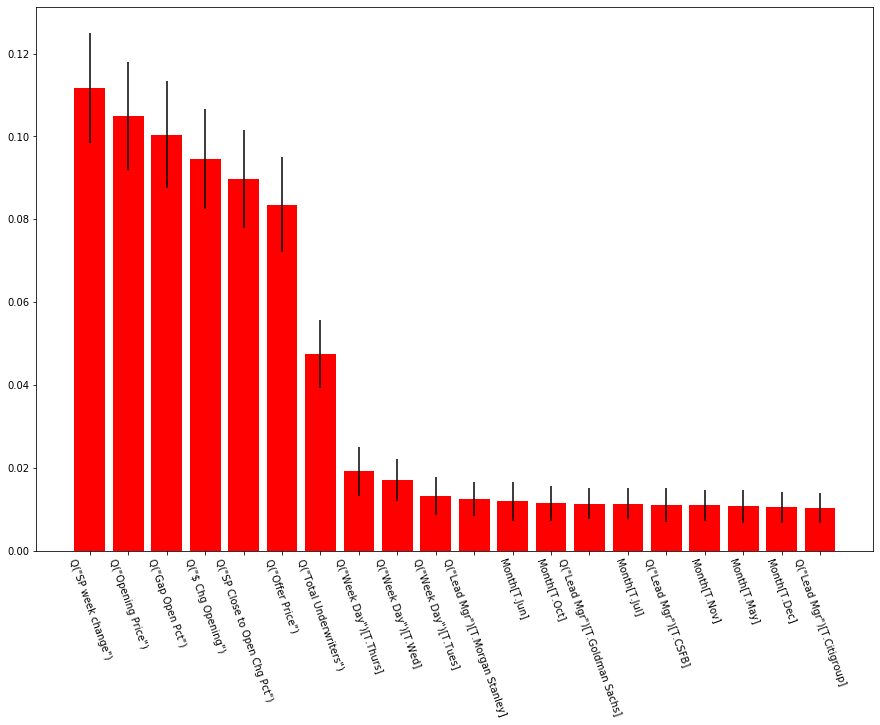

In [134]:
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]
plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);